In [1]:
import pandas_datareader as pdr
key="0d1135967c78f8865e55fac4880286be95745e12"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-12-31 00:00:00+00:00,105.26,107.030,104.82,107.01,40912316,24.377014,24.786926,24.275115,24.782294,163649264,0.0,1.0
1,AAPL,2016-01-04 00:00:00+00:00,105.35,105.368,102.00,102.61,67649387,24.397857,24.402026,23.622035,23.763304,270597548,0.0,1.0
2,AAPL,2016-01-05 00:00:00+00:00,102.71,105.850,102.41,105.75,55790992,23.786463,24.513651,23.716987,24.490493,223163968,0.0,1.0
3,AAPL,2016-01-06 00:00:00+00:00,100.70,102.370,99.87,100.56,68457388,23.320970,23.707723,23.128752,23.288548,273829552,0.0,1.0
4,AAPL,2016-01-07 00:00:00+00:00,96.45,100.130,96.43,98.68,81094428,22.336719,23.188965,22.332087,22.853161,324377712,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-12-21 00:00:00+00:00,128.23,128.310,123.449,125.02,121251553,128.23,128.310,123.449,125.02,121251553,0.0,1.0
1253,AAPL,2020-12-22 00:00:00+00:00,131.88,134.405,129.650,131.61,169351825,131.88,134.405,129.650,131.61,169351825,0.0,1.0
1254,AAPL,2020-12-23 00:00:00+00:00,130.96,132.430,130.780,132.16,88223692,130.96,132.430,130.780,132.16,88223692,0.0,1.0
1255,AAPL,2020-12-24 00:00:00+00:00,131.97,133.460,131.100,131.32,54930064,131.97,133.460,131.100,131.32,54930064,0.0,1.0
1256,AAPL,2020-12-28 00:00:00+00:00,136.69,137.340,133.510,133.99,123124632,136.69,137.340,133.510,133.99,123124632,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       105.26
1       105.35
2       102.71
3       100.70
4        96.45
         ...  
1252    128.23
1253    131.88
1254    130.96
1255    131.97
1256    136.69
Name: close, Length: 1257, dtype: float64

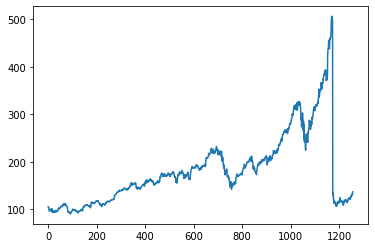

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:

import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.03588695]
 [0.03610343]
 [0.02975346]
 ...
 [0.09770295]
 [0.10013229]
 [0.11148527]]


In [14]:
#data split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(1005, 252)

In [16]:
train_data

array([[0.03588695],
       [0.03610343],
       [0.02975346],
       ...,
       [0.46645821],
       [0.48002405],
       [0.47975947]])

In [17]:
#array conversion to matrix
#0...149  150
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into t,t+1,t+2
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(854, 150)
(854,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(101, 150)
(101,)


(None, None)

In [21]:
# reshape datainput--> [samples, time steps, features] for our stacked bi-directional LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Bidirectional

In [23]:
model=Sequential()
model.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(150,1))))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=1000,batch_size=64,verbose=1)

Epoch 1/1000
14/14 [==============================] - 12s 192ms/step - loss: 0.0222 - val_loss: 0.0751
Epoch 2/1000
14/14 [==============================] - 1s 48ms/step - loss: 0.0030 - val_loss: 0.0631
Epoch 3/1000
14/14 [==============================] - 1s 42ms/step - loss: 0.0013 - val_loss: 0.0601
Epoch 4/1000
14/14 [==============================] - 1s 42ms/step - loss: 5.6541e-04 - val_loss: 0.0622
Epoch 5/1000
14/14 [==============================] - 1s 42ms/step - loss: 3.1046e-04 - val_loss: 0.0542
Epoch 6/1000
14/14 [==============================] - 1s 48ms/step - loss: 2.8255e-04 - val_loss: 0.0566
Epoch 7/1000
14/14 [==============================] - 1s 38ms/step - loss: 2.4407e-04 - val_loss: 0.0497
Epoch 8/1000
14/14 [==============================] - 1s 38ms/step - loss: 2.3446e-04 - val_loss: 0.0475
Epoch 9/1000
14/14 [==============================] - 1s 39ms/step - loss: 2.1335e-04 - val_loss: 0.0438
Epoch 10/1000
14/14 [==============================] - 1s 41ms/st

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 150, 100)          20800     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 150, 100)          60400     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 141,701
Trainable params: 141,701
Non-trainable params: 0
_________________________________________________________________


In [25]:
import tensorflow as tf
tf.__version__

'2.4.0'

In [26]:
#checking the perfomance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
#transforming back to the inverse/natural form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
#calculation of perfomance metrics of rmse{root mean squarred error}
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

176.95148522216076

In [29]:
#testing the data using rmse
math.sqrt(mean_squared_error(ytest,test_predict))

230.0746094850173

Plotting the data

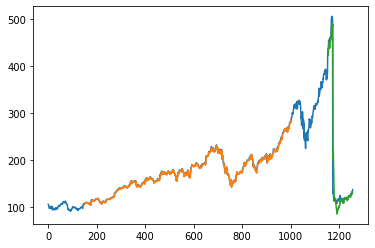

In [30]:
# shifting the train predictions made for plotting and visualization
look_back=150
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shifting the test predictions made for plotting and visualization
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plotting the baseline and predictions made
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
len(test_data)

252

In [32]:
x_input=test_data[102:].reshape(1,-1)
x_input.shape

(1, 150)

In [33]:
#dump this to a list

temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.5478532772098617,
 0.5481900180396873,
 0.5474443776307878,
 0.5568490679494889,
 0.5604329524954901,
 0.5647143716175587,
 0.5579795550210462,
 0.5800601322910404,
 0.584774503908599,
 0.6101022248947685,
 0.6313890559230306,
 0.5906434155141311,
 0.5976187612748045,
 0.607696933253157,
 0.6295610342754059,
 0.6283824413710162,
 0.628719182200842,
 0.6238845460012028,
 0.6458929645219482,
 0.6643174984966926,
 0.6487552615754661,
 0.6602525556223691,
 0.6332892363199039,
 0.6528923631990378,
 0.6601563439567049,
 0.6584966927239928,
 0.6584966927239928,
 0.6819242333132893,
 0.6791340950090199,
 0.7000120264582081,
 0.7039567047504509,
 0.7055682501503309,
 0.7013108839446784,
 0.7165123271196634,
 0.7229344558027659,
 0.7113650030066145,
 0.7094888755261575,
 0.7290198436560433,
 0.7159591100420926,
 0.7185808779314491,
 0.6759831629585087,
 0.673770294648226,
 0.6948887552615755,
 0.6799037883343355,
 0.6971016235718581,
 0.7081659651232712,
 0.8050511124473845,
 0.83081178592904

**Predictions for the next *month***

In [34]:
#get the array module
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<30):
    
    if(len(temp_input)>150):
        #print(temp_input)---->here
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)---->here
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)---->here
        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.10752136]
151
1 day input [0.54819002 0.54744438 0.55684907 0.56043295 0.56471437 0.55797956
 0.58006013 0.5847745  0.61010222 0.63138906 0.59064342 0.59761876
 0.60769693 0.62956103 0.62838244 0.62871918 0.62388455 0.64589296
 0.6643175  0.64875526 0.66025256 0.63328924 0.65289236 0.66015634
 0.65849669 0.65849669 0.68192423 0.6791341  0.70001203 0.7039567
 0.70556825 0.70131088 0.71651233 0.72293446 0.711365   0.70948888
 0.72901984 0.71595911 0.71858088 0.67598316 0.67377029 0.69488876
 0.67990379 0.69710162 0.70816597 0.80505111 0.83081179 0.83781118
 0.8416356  0.87858088 0.85173782 0.86727601 0.83502105 0.86999399
 0.88923632 0.88825015 0.8853638  0.89455201 0.89594708 0.92064943
 0.97929044 0.99360192 0.98366807 1.         0.98544799 0.9834997
 0.09308479 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096
 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113
 0.04810583 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661
 0.0527721  0.05921828 0.05712568 0.

In [35]:
day_new=np.arange(1,151)
day_pred=np.arange(151,181)

In [36]:
import matplotlib.pyplot as plt
len(df1)

1257

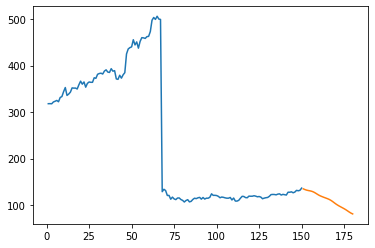

In [37]:
plt.plot(day_new,scaler.inverse_transform(df1[1107:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

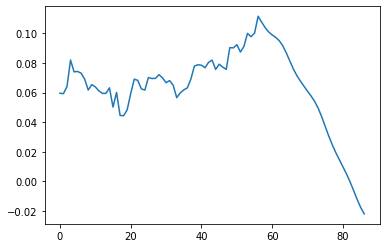

In [38]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

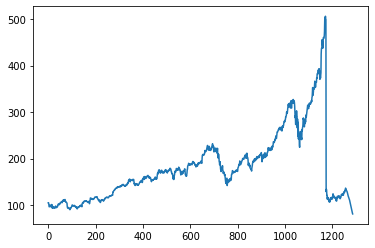

In [39]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)